In [ ]:
# function transormation 

import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np



In [31]:
data = pd.read_csv(r'C:\Users\User\juypter\files\loan.csv')
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [32]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_10092\1747614542.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["CoapplicantIncome"])


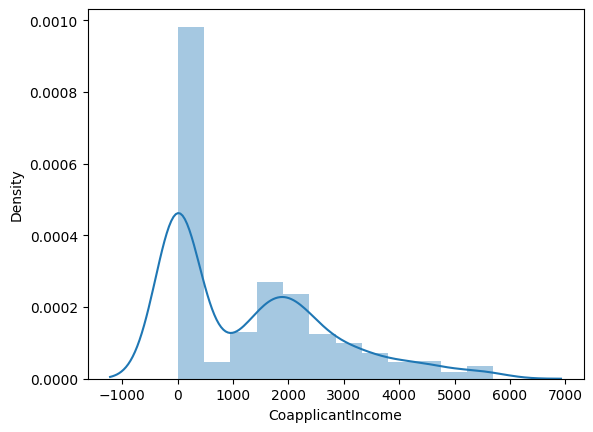

In [36]:
import matplotlib.pyplot as plt
sns.distplot(data["CoapplicantIncome"])
plt.show()

In [34]:
# applyying IQR method to removing outliers

Q1 = data["CoapplicantIncome"].quantile(0.25)
Q3 = data["CoapplicantIncome"].quantile(0.75)
iqr = Q3 - Q1
min_range = Q1 - 1.5 * iqr
max_range = Q3 + 1.5 * iqr
min_range,max_range


(-3445.875, 5743.125)

In [35]:
data = data[data["CoapplicantIncome"] < max_range]


In [37]:
from sklearn.preprocessing import FunctionTransformer

In [39]:
ft = FunctionTransformer(func=np.log1p)

In [40]:
ft.fit(data[["CoapplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [48]:
data["CoapplicantIncome_tf"] = ft.transform(data[["CoapplicantIncome"]])

C:\Users\User\AppData\Local\Temp\ipykernel_10092\1538192804.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["CoapplicantIncome"])
C:\Users\User\AppData\Local\Temp\ipykernel_10092\1538192804.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["CoapplicantIncome_tf"])


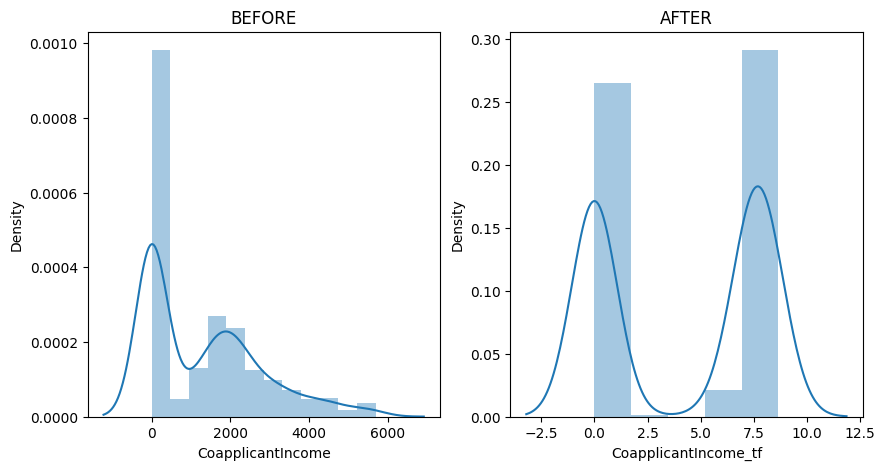

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.title("BEFORE")
sns.distplot(data["CoapplicantIncome"])

plt.subplot(1,2,2)
plt.title("AFTER")
sns.distplot(data["CoapplicantIncome_tf"])

plt.show()